# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Observations
#1. Latitude has the greatest effect on max temperature. Southern hemisphere latitude vs temperature has a postive 
#moderate correlation with an r-squared value of 0.52 while northern hemisphere latitude vs temerature has a negative
#strong correlation with an r-squared value of 0.77
#2. The other correlations are very weak suggesting latitude has little to no effect on wind speed, cloudiness or humidity.
#3. Judging by the graphs of southern and northern hemisphere data points, there are significantly more data points for 
#locations in the norhtern hemisphere. To have a true comparison, it would be good to have an equal number of data points
#for both hemispheres.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
city = "Charlotte, North Carolina"
url_query = url + city + "&appid=" + weather_api_key + "&units=imperial"
response = requests.get(url_query).json()
print(json.dumps(response, indent = 4))

{
    "coord": {
        "lon": -80.84,
        "lat": 35.23
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 76.32,
        "feels_like": 79.56,
        "temp_min": 73.99,
        "temp_max": 78.01,
        "pressure": 1024,
        "humidity": 60
    },
    "visibility": 10000,
    "wind": {
        "speed": 1.01,
        "deg": 99,
        "gust": 3
    },
    "clouds": {
        "all": 94
    },
    "dt": 1603318085,
    "sys": {
        "type": 3,
        "id": 2007844,
        "country": "US",
        "sunrise": 1603280096,
        "sunset": 1603320032
    },
    "timezone": -14400,
    "id": 4460243,
    "name": "Charlotte",
    "cod": 200
}


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
#{city name}&appid={API key}
maxTemps = []
lat = []
lng = []
humidity = []
clouds = []
windSpeed = []
country = []
date = []
count = 1
sets = 1

print("Beginning data retrieval")
print("-------------------------------")

for city in cities:
    url_query = url + city + "&appid=" + weather_api_key + "&units=imperial"
    response = requests.get(url_query).json()
    
    try:
        print(f"Processing record {count} of set {sets} | {city}")
        maxTemps.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    except (KeyError, IndexError):
        maxTemps.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        humidity.append(np.nan)
        clouds.append(np.nan)
        windSpeed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        print(f"Could not find {city}. Skipping.....")
    count = count + 1
    if count == 51:
        count = 1
        sets = sets +1
    
    

Beginning data retrieval
-------------------------------
Processing record 1 of set 1 | port hawkesbury
Processing record 2 of set 1 | maputo
Processing record 3 of set 1 | busselton
Processing record 4 of set 1 | kapaa
Processing record 5 of set 1 | alice springs
Processing record 6 of set 1 | punta arenas
Processing record 7 of set 1 | victoria
Processing record 8 of set 1 | mareeba
Processing record 9 of set 1 | acapulco
Processing record 10 of set 1 | verkhoyansk
Processing record 11 of set 1 | chuy
Processing record 12 of set 1 | cidreira
Processing record 13 of set 1 | belushya guba
Could not find belushya guba. Skipping.....
Processing record 14 of set 1 | tiksi
Processing record 15 of set 1 | trelew
Processing record 16 of set 1 | yellowknife
Processing record 17 of set 1 | kijang
Processing record 18 of set 1 | mahebourg
Processing record 19 of set 1 | thompson
Processing record 20 of set 1 | ushuaia
Processing record 21 of set 1 | mataura
Processing record 22 of set 1 | rikit

Processing record 37 of set 4 | bajil
Processing record 38 of set 4 | alofi
Processing record 39 of set 4 | labutta
Could not find labutta. Skipping.....
Processing record 40 of set 4 | shu
Processing record 41 of set 4 | deputatskiy
Processing record 42 of set 4 | katsuura
Processing record 43 of set 4 | klyuchi
Processing record 44 of set 4 | mahina
Processing record 45 of set 4 | linguere
Processing record 46 of set 4 | khani
Processing record 47 of set 4 | illoqqortoormiut
Could not find illoqqortoormiut. Skipping.....
Processing record 48 of set 4 | tual
Processing record 49 of set 4 | tingrela
Could not find tingrela. Skipping.....
Processing record 50 of set 4 | jumla
Processing record 1 of set 5 | saint-francois
Processing record 2 of set 5 | sao filipe
Processing record 3 of set 5 | haines junction
Processing record 4 of set 5 | saint-georges
Processing record 5 of set 5 | bennington
Processing record 6 of set 5 | bilma
Processing record 7 of set 5 | staraya kulatka
Processing

Processing record 23 of set 8 | bubaque
Processing record 24 of set 8 | northam
Processing record 25 of set 8 | ternate
Processing record 26 of set 8 | roald
Processing record 27 of set 8 | caravelas
Processing record 28 of set 8 | luderitz
Processing record 29 of set 8 | kem
Processing record 30 of set 8 | adrar
Processing record 31 of set 8 | serenje
Processing record 32 of set 8 | soverato
Processing record 33 of set 8 | sechura
Processing record 34 of set 8 | nanakuli
Processing record 35 of set 8 | ilhabela
Processing record 36 of set 8 | neryungri
Processing record 37 of set 8 | clyde river
Processing record 38 of set 8 | misratah
Processing record 39 of set 8 | manggar
Processing record 40 of set 8 | cockburn town
Processing record 41 of set 8 | sheopur
Processing record 42 of set 8 | roma
Processing record 43 of set 8 | namatanai
Processing record 44 of set 8 | terrace
Processing record 45 of set 8 | asau
Processing record 46 of set 8 | privokzalnyy
Could not find privokzalnyy.

Processing record 5 of set 12 | nogales
Processing record 6 of set 12 | kolokani
Processing record 7 of set 12 | guane
Processing record 8 of set 12 | mutsamudu
Could not find mutsamudu. Skipping.....
Processing record 9 of set 12 | paita
Processing record 10 of set 12 | butterworth
Processing record 11 of set 12 | armacao dos buzios
Could not find armacao dos buzios. Skipping.....
Processing record 12 of set 12 | carlos chagas
Processing record 13 of set 12 | pano aqil
Processing record 14 of set 12 | gazojak
Processing record 15 of set 12 | tucano
Processing record 16 of set 12 | cabra
Processing record 17 of set 12 | nguru
Processing record 18 of set 12 | itapaci
Processing record 19 of set 12 | gogrial
Processing record 20 of set 12 | zhanaozen
Processing record 21 of set 12 | santa eulalia del rio
Could not find santa eulalia del rio. Skipping.....
Processing record 22 of set 12 | yumen
Processing record 23 of set 12 | bereda
Processing record 24 of set 12 | sur
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
print(len(maxTemps))

612


In [18]:
weatherInfo = pd.DataFrame({"City": cities, "Lat": lat, "Lng":lng, "Max Temp": maxTemps, "Humidity": humidity,
                           "Cloudiness": clouds, "Wind Speed": windSpeed, "Country": country, "Date": date})
weatherInfo.dropna()
weatherInfo.to_csv("WeatherInfo.csv", encoding='utf-8', index=False)
weatherInfo.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hawkesbury,45.62,-61.35,51.01,100.0,90.0,11.41,CA,1.603320e+09
1,maputo,-25.97,32.59,70.00,78.0,16.0,4.00,MZ,1.603320e+09
2,busselton,-33.65,115.33,55.00,66.0,1.0,10.92,AU,1.603320e+09
3,kapaa,22.08,-159.32,84.99,74.0,90.0,3.36,US,1.603320e+09
4,alice springs,-23.70,133.88,82.40,34.0,2.0,6.93,AU,1.603320e+09


In [19]:
weatherInfo.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,18.351541,16.189642,61.003817,73.238351,51.121864,7.727258,1.603320e+09
std,33.364215,89.562951,20.624656,20.354281,38.280541,4.724157,7.033500e+01
min,-54.800000,-179.170000,-0.400000,8.000000,0.000000,0.290000,1.603320e+09
25%,-9.765000,-61.650000,48.200000,64.000000,11.250000,4.235000,1.603320e+09
50%,20.055000,22.195000,66.310000,78.000000,53.500000,6.930000,1.603320e+09
75%,47.760000,92.107500,77.065000,88.000000,90.000000,10.472500,1.603320e+09
max,78.220000,178.420000,97.000000,100.000000,100.000000,24.160000,1.603320e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
highHumidity = weatherInfo.loc[weatherInfo["Humidity"]>100,:]
highHumidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [6]:
weatherInfo= pd.read_csv("WeatherInfo.csv")
weatherInfo.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hawkesbury,45.62,-61.35,51.01,100.0,90.0,11.41,CA,1.603320e+09
1,maputo,-25.97,32.59,70.00,78.0,16.0,4.00,MZ,1.603320e+09
2,busselton,-33.65,115.33,55.00,66.0,1.0,10.92,AU,1.603320e+09
3,kapaa,22.08,-159.32,84.99,74.0,90.0,3.36,US,1.603320e+09
4,alice springs,-23.70,133.88,82.40,34.0,2.0,6.93,AU,1.603320e+09


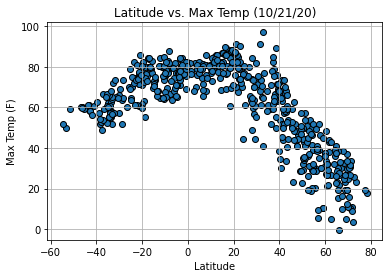

In [29]:
plt.scatter(weatherInfo["Lat"], weatherInfo["Max Temp"], edgecolors = "black")
plt.title("Latitude vs. Max Temp (10/21/20)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
#this plot shows that temperatures tend to be the highest around the equator (or at 0 degrees).
#As latitude moves away from 0 in either direction, the temperature decreases, however moving north, the temperature
#decreases more quickly as opposed to moving south.

## Latitude vs. Humidity Plot

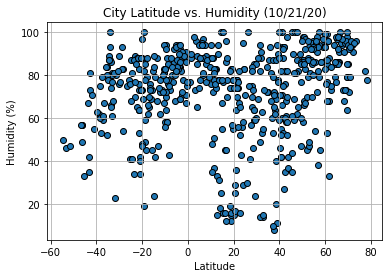

In [31]:
plt.scatter(weatherInfo["Lat"], weatherInfo["Humidity"], edgecolors = "black")
plt.title("City Latitude vs. Humidity (10/21/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
# There isn't a correlation between latitude and humidity. It looks like it could be a slightly positive correlation, but
# the correlation would be extremely weak. 

## Latitude vs. Cloudiness Plot

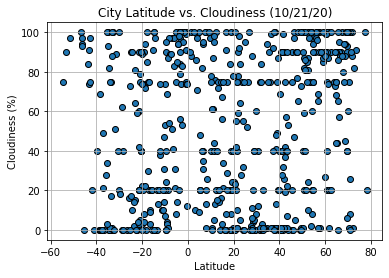

In [32]:
plt.scatter(weatherInfo["Lat"], weatherInfo["Cloudiness"], edgecolors = "black")
plt.title("City Latitude vs. Cloudiness (10/21/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
# There isn't a correlation between latitude and cloudiness. The graph is nearly evenly distributed.

## Latitude vs. Wind Speed Plot

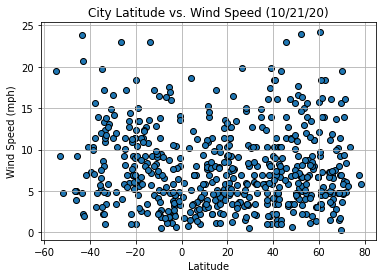

In [33]:
plt.scatter(weatherInfo["Lat"], weatherInfo["Wind Speed"], edgecolors = "black")
plt.title("City Latitude vs. Wind Speed (10/21/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

In [ ]:
# Similar to humidity, there isn't a correlation between latitude and wind speed. 
# It looks like it could be a slightly positive correlation, but the correlation would be extremely weak. 

## Linear Regression

In [34]:
northInfo = weatherInfo.loc[weatherInfo["Lat"]>=0,:]
southInfo = weatherInfo.loc[weatherInfo["Lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.7716246253760223


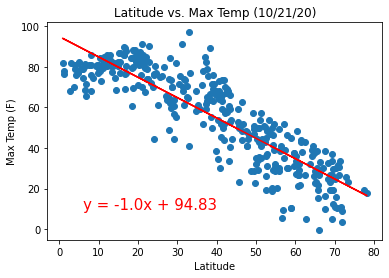

In [36]:
xValues = northInfo["Lat"]
yValues = northInfo["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temp (10/21/20)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#As the latitude increases (the further it gets from the equator), the lower the max temperature (it gets colder). 
#The r-squared value is 0.77 meaning there is a strong correlation between latitude and max temp.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared value is 0.5280466542508064


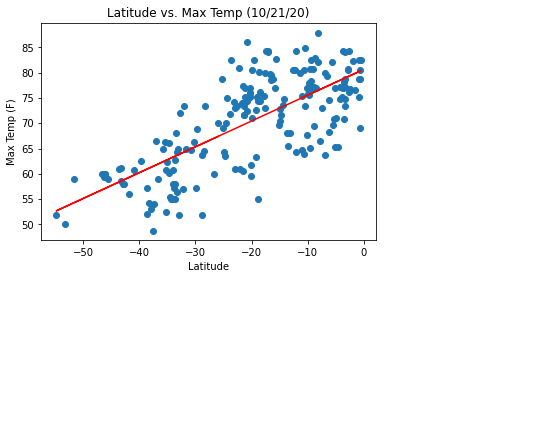

In [22]:
xValues = southInfo["Lat"]
yValues = southInfo["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Max Temp (10/21/20)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#As the latitude increases (the closer we get to the equator), the higher the max temperature (it gets warmer). 
#The r-squared value is 0.53 meaning there is a moderate correlation between latitude and max temp.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.07272494494507618


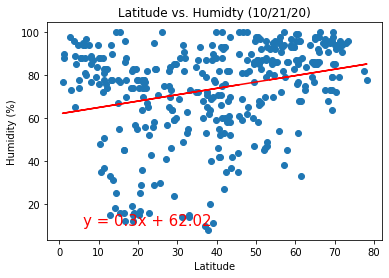

In [23]:
xValues = northInfo["Lat"]
yValues = northInfo["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidty (10/21/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#As the latitude increases (the farther we get to the equator), the greater the humidity gets. 
#The r-squared value is 0.07 meaning there is a weak correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared value is 0.10637799948738247


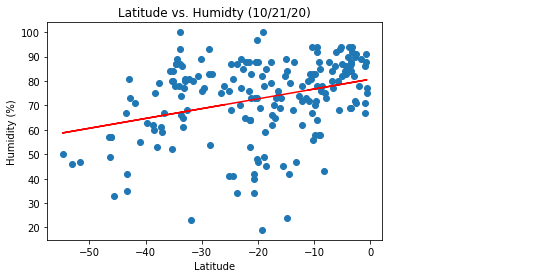

In [24]:
xValues = southInfo["Lat"]
yValues = southInfo["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Humidty (10/21/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#As the latitude increases (the closer we get to the equator), the greater the humidity gets. 
#The r-squared value is 0.11 meaning there is a weak correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.059814252347767376


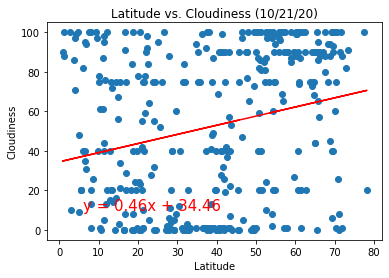

In [25]:
xValues = northInfo["Lat"]
yValues = northInfo["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (10/21/20)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#There's no significant correlation between latitude and cloudiness. The r-squared value is .06 which is a very weak correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared value is 0.019910663360198363


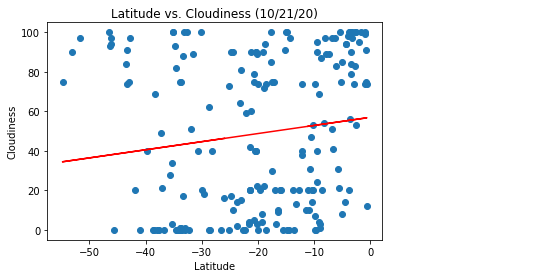

In [26]:
xValues = southInfo["Lat"]
yValues = southInfo["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Cloudiness (10/21/20)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#There's no significant correlation between latitude and cloudiness. The r-squared value is .02 which is a very weak correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.013498484421390636


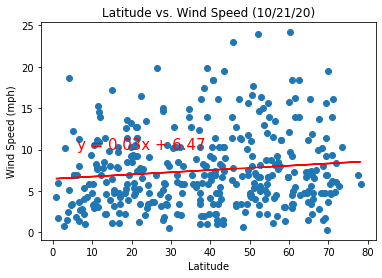

In [27]:
xValues = northInfo["Lat"]
yValues = northInfo["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (10/21/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#There's no significant correlation between latitude and wind speed. 
#The r-squared value is .01 which is a very weak correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared value is 0.04140540359004873


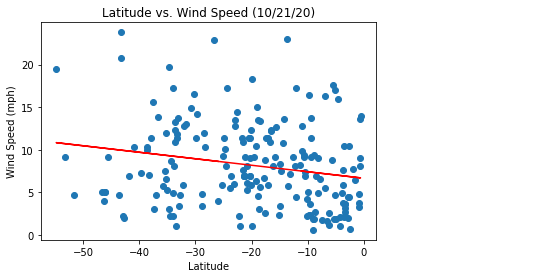

In [37]:
xValues = southInfo["Lat"]
yValues = southInfo["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues, yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Latitude vs. Wind Speed (10/21/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The R-squared value is {rvalue**2}")
plt.show()


In [ ]:
#There's no significant correlation between latitude and wind speed. 
#The r-squared value is .04 which is a very weak correlation.